In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Mounted at /content/drive


In [ ]:
specific_direction="/content/drive/My Drive/20191112_CUMOOC_Data/Raw Data/"
cvocp_user_course_timing_masked = pd.read_csv(specific_direction+'01_cvocp_user_course_timing_masked.csv')

In [ ]:
cvocp_user_course_timing_masked.head()

,record_id,cv_uid,cv_cid,action_type,assoc_id,assoc_id2,timestamp
0,1,KP0XGECF1SGVOS2O24VF,UMF4ZAMAJ3UAKSY5URJR,quiz_submitted,JMYCQPQ9ZCPXEEEMSHIH,SRGWN4LOSQEK8A51ENFQ,1530413688
1,2,KP0XGECF1SGVOS2O24VF,UMF4ZAMAJ3UAKSY5URJR,quiz_submitted,JMYCQPQ9ZCPXEEEMSHIH,SRGWN4LOSQEK8A51ENFQ,1530413709
2,3,KP0XGECF1SGVOS2O24VF,UMF4ZAMAJ3UAKSY5URJR,quiz_submitted,JMYCQPQ9ZCPXEEEMSHIH,SRGWN4LOSQEK8A51ENFQ,1530413724
3,4,KP0XGECF1SGVOS2O24VF,UMF4ZAMAJ3UAKSY5URJR,quiz_submitted,JMYCQPQ9ZCPXEEEMSHIH,SRGWN4LOSQEK8A51ENFQ,1530413741
4,5,KH8UA5P183ESRY8BQSNP,7M978UYOQ7J2A0EGDK3D,quiz_opened,83PK3M4EQRNVOPDASXCL,7LSY9RBX6NM0NX4RC4RY,1530413927


In [ ]:
cvocp_user_course_timing_masked['action_type'].unique()

array(['quiz_submitted', 'quiz_opened', 'completed_intime', 'enrolled',
       'completed_late', 'quiz_timer_started', 'quiz_timer_out'],
      dtype=object)

# ผลรวม Action ของแต่ละ User ในแต่และ Course

In [ ]:
counted_actiontype_by_uid_cid = cvocp_user_course_timing_masked.groupby(['cv_uid','cv_cid']).agg(['count'])['action_type']
counted_actiontype_by_uid_cid = counted_actiontype_by_uid_cid.reset_index()
counted_actiontype_by_uid_cid = counted_actiontype_by_uid_cid.rename(columns={'count' : 'action_number'})
counted_actiontype_by_uid_cid.head()


,cv_uid,cv_cid,action_number
0,000ANBTDI80A0Y2PIL4U,AVPWBZUG9B5RZUVH16AX,3
1,004ENR7RXF21IELU51IA,9PE6IVRI6M26W9XBOHI2,3
2,00574YBLGPAOIU4NA7NK,FNONNX6ZNA8NP3F1FCTV,6
3,00574YBLGPAOIU4NA7NK,MMDD3WQPWTPBBPWHAG7R,9
4,00574YBLGPAOIU4NA7NK,WJRPZZZ2IEYBGO5YLJ4U,17


# Set ของ uid ในแต่ละ cid ที่มีการบันทึกว่า enroll เข้า


In [ ]:
enrolled_user = set()
for i in range (len(cvocp_user_course_timing_masked)):
  if(cvocp_user_course_timing_masked['action_type'][i] == 'enrolled'):
    enrolled_user.add((cvocp_user_course_timing_masked['cv_uid'][i],cvocp_user_course_timing_masked['cv_cid'][i]))

# Set ของ uid ในแต่ละ cid ที่มีการบันทึกว่า complete

In [ ]:
complete_user = set()
for i in range (len(cvocp_user_course_timing_masked)):
  if('completed' in cvocp_user_course_timing_masked['action_type'][i]):
    complete_user.add((cvocp_user_course_timing_masked['cv_uid'][i],cvocp_user_course_timing_masked['cv_cid'][i]))

In [ ]:
print(len(enrolled_user),len(complete_user))

109499 24622


# ข้อมูลส่วนตัวของ uid แต่ละคน cid

In [ ]:
cvocp_user_info_masked = pd.read_csv(specific_direction+"05_cvocp_user_info_masked.csv")
cvocp_user_info_masked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51036 entries, 0 to 51035
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cv_uid       51036 non-null  object 
 1   education    51035 non-null  object 
 2   occupation   51035 non-null  object 
 3   gender       51035 non-null  object 
 4   yearofbirth  51035 non-null  float64
 5   residence    51035 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.3+ MB


In [ ]:
dataframe = counted_actiontype_by_uid_cid.join(cvocp_user_info_masked.set_index('cv_uid'), on ='cv_uid')
dataframe.head()

,cv_uid,cv_cid,action_number,education,occupation,gender,yearofbirth,residence
0,000ANBTDI80A0Y2PIL4U,AVPWBZUG9B5RZUVH16AX,3,NaN,NaN,NaN,NaN,NaN
1,004ENR7RXF21IELU51IA,9PE6IVRI6M26W9XBOHI2,3,Bachelor Degree,Govenment/State Enterprise Employee,Male,1972.0,Bangkok
2,00574YBLGPAOIU4NA7NK,FNONNX6ZNA8NP3F1FCTV,6,Above Bachelor Degree,Private Sector Employee,Female,1996.0,"Eastern Region, Thailand"
3,00574YBLGPAOIU4NA7NK,MMDD3WQPWTPBBPWHAG7R,9,Above Bachelor Degree,Private Sector Employee,Female,1996.0,"Eastern Region, Thailand"
4,00574YBLGPAOIU4NA7NK,WJRPZZZ2IEYBGO5YLJ4U,17,Above Bachelor Degree,Private Sector Employee,Female,1996.0,"Eastern Region, Thailand"


# ข้อมูลแต่ cid

In [ ]:
cvocp_course_masked = pd.read_csv(specific_direction+"03_cvocp_course_masked.csv")

In [ ]:
cvocp_course_masked['course_duration'] = cvocp_course_masked['course_end'] - cvocp_course_masked['course_start']
cvocp_course_masked['reg_duration'] = cvocp_course_masked['reg_end'] - cvocp_course_masked['reg_start']

In [ ]:
cvocp_course_masked.head()

,cv_cid,course_title,course_no,year,semester,instructor_string,course_start,course_end,reg_start,reg_end,roster_limit,reg_workflow,course_type,status,course_duration,reg_duration
0,USIS5STDNOBQGGHXDDG7,การควบคุมยาสูบ รุ่นที่ 4,TRC.2016,2016,1,NaN,0,0,0,0,45,invited_selfreg,selfpace,1,0,0
1,ODRCRDFROFTNYRC0PQU2,Survival Thai (2016),CU.MOOC.0001,2016,2,NaN,1483491600,1496249999,1483491600,1485881999,14,invited_selfreg,selfpace,1,12758399,2390399
2,9W16HUAN3F0LB16BN1QC,การควบคุมยาสูบ รุ่นที่ 5,TRC.ELearning,2017,1,NaN,1501779600,1528736399,0,0,50,purchase_to_enroll,weekly,1,26956799,0
3,NTFBS3C5O5HPWTX9B8YJ,ภาษาอาหรับในชีวิตประจำวัน,CU.MOOC.0002,2017,1,อ. ดร.ทรงศักดิ์ หมัดสะและ,1504803600,1509469199,1504803600,1508086799,100,purchase_to_enroll,selfpace,1,4665599,3283199
4,P074WP7NLCCMPJ200PE8,การทำความเข้าใจงบการเงิน,CU.MOOC.0003,2017,1,ผศ. ดร.พิมพ์พนา ปีตธวัชชัย,1504803600,1509469199,1504803600,1508086799,2000,free_selfreg,selfpace,1,4665599,3283199


In [ ]:
dataframe2 = dataframe.join(cvocp_course_masked.set_index('cv_cid')[['reg_workflow','course_type','roster_limit','course_duration','reg_duration']] , on='cv_cid')
#dataframe2.drop('action_number', inplace= True , axis = 1)
dataframe2.head()

,cv_uid,cv_cid,action_number,education,occupation,gender,yearofbirth,residence,reg_workflow,course_type,roster_limit,course_duration,reg_duration
0,000ANBTDI80A0Y2PIL4U,AVPWBZUG9B5RZUVH16AX,3,NaN,NaN,NaN,NaN,NaN,free_selfreg,selfpace,4000,4924799,4924799
1,004ENR7RXF21IELU51IA,9PE6IVRI6M26W9XBOHI2,3,Bachelor Degree,Govenment/State Enterprise Employee,Male,1972.0,Bangkok,free_selfreg,selfpace,4000,4924799,4924799
2,00574YBLGPAOIU4NA7NK,FNONNX6ZNA8NP3F1FCTV,6,Above Bachelor Degree,Private Sector Employee,Female,1996.0,"Eastern Region, Thailand",free_selfreg,selfpace,4000,4809599,4809599
3,00574YBLGPAOIU4NA7NK,MMDD3WQPWTPBBPWHAG7R,9,Above Bachelor Degree,Private Sector Employee,Female,1996.0,"Eastern Region, Thailand",free_selfreg,selfpace,4000,6566399,6566399
4,00574YBLGPAOIU4NA7NK,WJRPZZZ2IEYBGO5YLJ4U,17,Above Bachelor Degree,Private Sector Employee,Female,1996.0,"Eastern Region, Thailand",free_selfreg,selfpace,4000,4809599,4809599


In [ ]:
dataframe2['complete'] = False
for i in range (len(dataframe2)):
  dataframe2['complete'][i] =  (dataframe2['cv_uid'][i],dataframe2['cv_cid'][i]) in complete_user

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(sum(dataframe2['complete'] == True))

24622


# Datafame

In [ ]:
dataframe2.head()

,cv_uid,cv_cid,action_number,education,occupation,gender,yearofbirth,residence,reg_workflow,course_type,roster_limit,course_duration,reg_duration,complete
0,000ANBTDI80A0Y2PIL4U,AVPWBZUG9B5RZUVH16AX,3,NaN,NaN,NaN,NaN,NaN,free_selfreg,selfpace,4000,4924799,4924799,False
1,004ENR7RXF21IELU51IA,9PE6IVRI6M26W9XBOHI2,3,Bachelor Degree,Govenment/State Enterprise Employee,Male,1972.0,Bangkok,free_selfreg,selfpace,4000,4924799,4924799,False
2,00574YBLGPAOIU4NA7NK,FNONNX6ZNA8NP3F1FCTV,6,Above Bachelor Degree,Private Sector Employee,Female,1996.0,"Eastern Region, Thailand",free_selfreg,selfpace,4000,4809599,4809599,False
3,00574YBLGPAOIU4NA7NK,MMDD3WQPWTPBBPWHAG7R,9,Above Bachelor Degree,Private Sector Employee,Female,1996.0,"Eastern Region, Thailand",free_selfreg,selfpace,4000,6566399,6566399,False
4,00574YBLGPAOIU4NA7NK,WJRPZZZ2IEYBGO5YLJ4U,17,Above Bachelor Degree,Private Sector Employee,Female,1996.0,"Eastern Region, Thailand",free_selfreg,selfpace,4000,4809599,4809599,False


In [ ]:
dataframe2['yearofbirth'].fillna(1900, inplace = True)
dataframe2.fillna("missing value" , inplace = True)
dataframe2.head()

,cv_uid,cv_cid,action_number,education,occupation,gender,yearofbirth,residence,reg_workflow,course_type,roster_limit,course_duration,reg_duration,complete
0,000ANBTDI80A0Y2PIL4U,AVPWBZUG9B5RZUVH16AX,3,missing value,missing value,missing value,1900.0,missing value,free_selfreg,selfpace,4000,4924799,4924799,False
1,004ENR7RXF21IELU51IA,9PE6IVRI6M26W9XBOHI2,3,Bachelor Degree,Govenment/State Enterprise Employee,Male,1972.0,Bangkok,free_selfreg,selfpace,4000,4924799,4924799,False
2,00574YBLGPAOIU4NA7NK,FNONNX6ZNA8NP3F1FCTV,6,Above Bachelor Degree,Private Sector Employee,Female,1996.0,"Eastern Region, Thailand",free_selfreg,selfpace,4000,4809599,4809599,False
3,00574YBLGPAOIU4NA7NK,MMDD3WQPWTPBBPWHAG7R,9,Above Bachelor Degree,Private Sector Employee,Female,1996.0,"Eastern Region, Thailand",free_selfreg,selfpace,4000,6566399,6566399,False
4,00574YBLGPAOIU4NA7NK,WJRPZZZ2IEYBGO5YLJ4U,17,Above Bachelor Degree,Private Sector Employee,Female,1996.0,"Eastern Region, Thailand",free_selfreg,selfpace,4000,4809599,4809599,False


In [ ]:
from sklearn.preprocessing import LabelEncoder

s = (dataframe2.dtypes == 'object')
object_cols = list(s[s].index) [2:]

In [ ]:
print(object_cols)
label_dataframe2 = dataframe2.copy()
label_dataframe2.head()

label_encoder = LabelEncoder()

for col in object_cols : 
  label_dataframe2[col] = label_encoder.fit_transform(dataframe2[col])

['education', 'occupation', 'gender', 'residence', 'reg_workflow', 'course_type']


In [ ]:
label_dataframe2.head()

,cv_uid,cv_cid,action_number,education,occupation,gender,yearofbirth,residence,reg_workflow,course_type,roster_limit,course_duration,reg_duration,complete
0,000ANBTDI80A0Y2PIL4U,AVPWBZUG9B5RZUVH16AX,3,3,9,3,1900.0,8,0,0,4000,4924799,4924799,False
1,004ENR7RXF21IELU51IA,9PE6IVRI6M26W9XBOHI2,3,1,3,1,1972.0,0,0,0,4000,4924799,4924799,False
2,00574YBLGPAOIU4NA7NK,FNONNX6ZNA8NP3F1FCTV,6,0,5,0,1996.0,2,0,0,4000,4809599,4809599,False
3,00574YBLGPAOIU4NA7NK,MMDD3WQPWTPBBPWHAG7R,9,0,5,0,1996.0,2,0,0,4000,6566399,6566399,False
4,00574YBLGPAOIU4NA7NK,WJRPZZZ2IEYBGO5YLJ4U,17,0,5,0,1996.0,2,0,0,4000,4809599,4809599,False


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWa

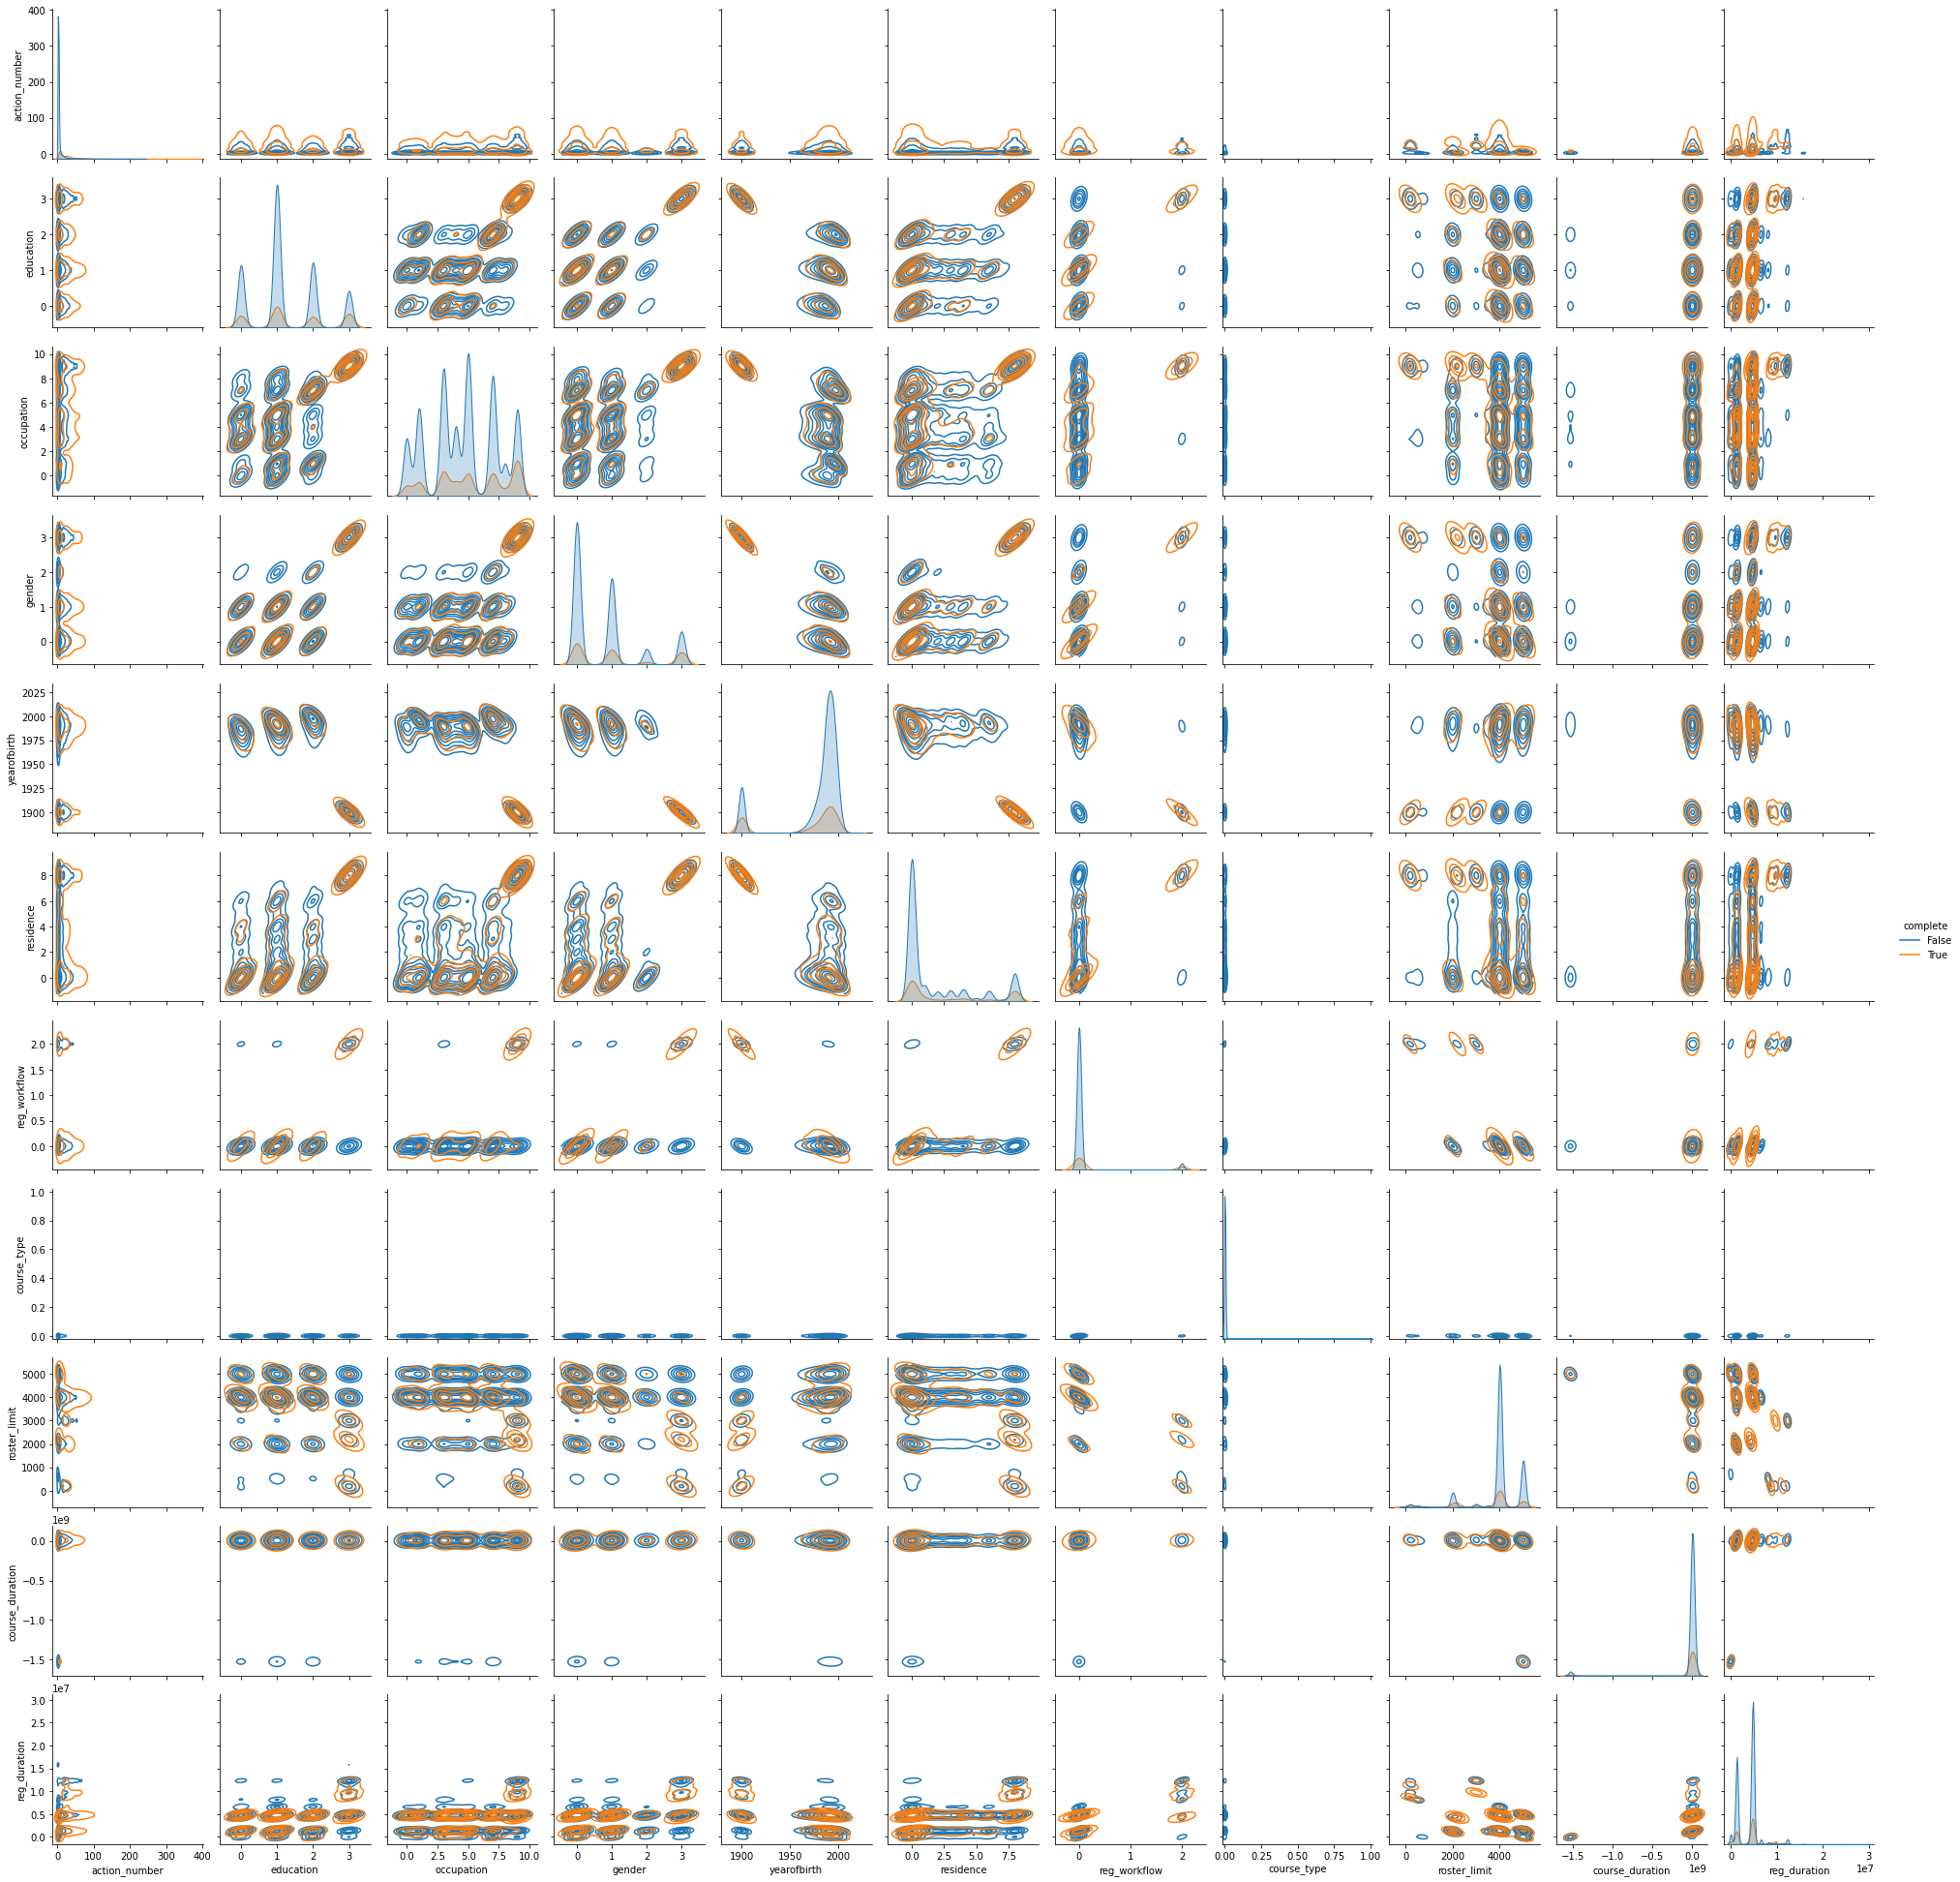

In [ ]:
#sns.pairplot( label_dataframe2[label_dataframe2.columns[2:]], hue = "complete" , kind="kde")

# Train and Test

In [ ]:
label_dataframe2.head()

,cv_uid,cv_cid,action_number,education,occupation,gender,yearofbirth,residence,reg_workflow,course_type,roster_limit,course_duration,reg_duration,complete
0,000ANBTDI80A0Y2PIL4U,AVPWBZUG9B5RZUVH16AX,3,3,9,3,1900.0,8,0,0,4000,4924799,4924799,False
1,004ENR7RXF21IELU51IA,9PE6IVRI6M26W9XBOHI2,3,1,3,1,1972.0,0,0,0,4000,4924799,4924799,False
2,00574YBLGPAOIU4NA7NK,FNONNX6ZNA8NP3F1FCTV,6,0,5,0,1996.0,2,0,0,4000,4809599,4809599,False
3,00574YBLGPAOIU4NA7NK,MMDD3WQPWTPBBPWHAG7R,9,0,5,0,1996.0,2,0,0,4000,6566399,6566399,False
4,00574YBLGPAOIU4NA7NK,WJRPZZZ2IEYBGO5YLJ4U,17,0,5,0,1996.0,2,0,0,4000,4809599,4809599,False


In [ ]:
from sklearn.model_selection import train_test_split

X = label_dataframe2[label_dataframe2.columns[3:-1]]
y = label_dataframe2[label_dataframe2.columns[-1]]

X_tv, X_test, y_tv , y_test = train_test_split(X, y, random_state = 5)
X_train, X_valid, y_train , y_valid = train_test_split(X_tv, y_tv, random_state = 5)

In [ ]:
print(len(y_tv),len(y_test))
print(len(y_train),len(y_valid))

84776 28259
63582 21194


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report

cumooc_model = DecisionTreeClassifier(random_state=1)
cumooc_model.fit(X_train, y_train)
val_predictions = cumooc_model.predict(X_valid)


print(classification_report(y_valid, val_predictions))

              precision    recall  f1-score   support

       False       0.85      0.92      0.88     16575
        True       0.57      0.40      0.47      4619

    accuracy                           0.80     21194
   macro avg       0.71      0.66      0.67     21194
weighted avg       0.79      0.80      0.79     21194



In [ ]:
test_predictions = cumooc_model.predict(X_test)

print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

       False       0.84      0.92      0.88     22087
        True       0.55      0.36      0.44      6172

    accuracy                           0.80     28259
   macro avg       0.69      0.64      0.66     28259
weighted avg       0.77      0.80      0.78     28259



In [ ]:
from sklearn.neural_network import MLPClassifier

cumooc_model = MLPClassifier(hidden_layer_sizes=(2, 3),max_iter=400)

cumooc_model.fit(X_train, y_train)
val_predictions = cumooc_model.predict(X_valid)

print(classification_report(y_valid, val_predictions))

              precision    recall  f1-score   support

       False       0.78      1.00      0.88     16575
        True       0.00      0.00      0.00      4619

    accuracy                           0.78     21194
   macro avg       0.39      0.50      0.44     21194
weighted avg       0.61      0.78      0.69     21194



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression

cumooc_model = LogisticRegression(random_state=0)

cumooc_model.fit(X_train, y_train)
val_predictions = cumooc_model.predict(X_valid)

print(classification_report(y_valid, val_predictions))

              precision    recall  f1-score   support

       False       0.78      1.00      0.88     16575
        True       0.00      0.00      0.00      4619

    accuracy                           0.78     21194
   macro avg       0.39      0.50      0.44     21194
weighted avg       0.61      0.78      0.69     21194



In [ ]:
from sklearn.ensemble import RandomForestClassifier

cumooc_model = RandomForestClassifier(random_state=1)

cumooc_model.fit(X_train, y_train)
val_predictions = cumooc_model.predict(X_valid)

print(classification_report(y_valid, val_predictions))

              precision    recall  f1-score   support

       False       0.84      0.93      0.89     16575
        True       0.61      0.39      0.47      4619

    accuracy                           0.81     21194
   macro avg       0.73      0.66      0.68     21194
weighted avg       0.79      0.81      0.80     21194



In [ ]:
test_predictions = cumooc_model.predict(X_test)

print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

       False       0.84      0.93      0.88     22087
        True       0.58      0.36      0.45      6172

    accuracy                           0.80     28259
   macro avg       0.71      0.64      0.66     28259
weighted avg       0.78      0.80      0.79     28259

